VAE model pretrain on MPII

In [1]:
# prepare data
from torch.utils.data import DataLoader, random_split
from data_utils import *

data = MPIIDataSet('datasets/mpii_human_pose_v1')
data_size = len(data)

train_size = data_size * 9 // 10
print("Train size: ", train_size)
val_size = data_size - train_size
batch_size = 32

train_set, val_set = random_split(data, [train_size, val_size])

train_data_loader = DataLoader(train_set,
                               batch_size=batch_size,
                               shuffle=True,
                               num_workers=4)
val_data_loader = DataLoader(val_set,
                             batch_size=1,
                             shuffle=True,
                             num_workers=4)

Train size:  22485


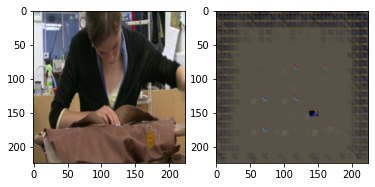

In [5]:
from vae import VAE
import matplotlib.pyplot as plt
model = VAE(latent_dim=512).eval()

model.load_state_dict(torch.load('models/vae_mark1.pth'))
model.eval()
fig, axs = plt.subplots(1, 2)
# sample = model.sample(num_samples = 1,
#                       current_device = device)[0].permute(1, 2, 0)
# axs[0].imshow(sample.cpu().detach().numpy())
for batch in val_data_loader:
    img = batch
    img_show = img.squeeze(0).permute(1, 2, 0)
    axs[0].imshow(img_show.detach().numpy())
    gen = model(img)[0].squeeze(0).permute(1, 2, 0)
    axs[1].imshow(gen.detach().numpy())
    plt.show()
    break